Aiyagari With Fat Tailed Wealth distribution  
============================================  

Carlos Lizama

This is a replication of the Aiyagari with Fat Tailed Distribution of Wealth model as in Achdou et. al. (2014). For a detailed exposition of the algorithm, see [this link](https://github.com/clizama/Fat_Tails_Aiyagari/blob/master/Aiyagari%20Model%20with%20Fat-tailed%20Wealth%20Distribution.pdf)

### Brief Description of the Model

Agents are heterogeneous in productivity and wealth with preferences given by $$ \mathbb{E}_0 \int_0^{\infty} e^{-\rho} u(c_t) dt $$
with $u(c_t) = \frac{c_t^{1-\gamma}}{1-\gamma}$

Productivity follows a two-state Poisson process $z_t \in \{ z_1, z_2 \}$. The process jumps fron state 1 to state 2 with intensitiy $\lambda_1$ and from state 2 to state 1 with intensity $\lambda_2$

There is a risky and a risk-free asset. The budget constraint is $ da_t = (z_t + r_t a_t + (R-r)k_t - c_t)dt + \sigma k_t dW_t $, where $a_t$ is total wealth and $k_t$ is the risky asset.

The model to be solved is summarized by the Hamilton-Jacobi-Bellman equation and the Folmogorov Forward equation.

\begin{align}
\rho v_i(a) & = \max_{c, 0 \leq k \leq a+\phi} u(c) + v_i'(a) (z_i + ra +(R-r)k-c) + \frac{1}{2} v_i''(a) \sigma^2 k^2 + \lambda_i (v_{-i}(a)-v_i(a))
\\
0 & = - \frac{d}{da} [s_i(a)g_i(a)] + \frac{1}{2} \frac{d^2}{da^2} [\sigma^2 k_i(a)^2 g_i(a)] - \lambda_i g_i(a) + \lambda_{-i} g_{-i}(a)
\end{align}

and the associated first order conditions are
\begin{align}
c_i(a) &= v_i'(a)^{-\frac{1}{\gamma}} \\
k_i(a) & = \min \left\{ - \frac{v_i'(a)}{v_i''(a)} \frac{(R-r)}{\sigma^2}, a+\phi \right\} % = \min \left\{ \frac{1}{2} \frac{(v_i'(a))^2}{v_i''(a)} \frac{(R-r)^2}{\sigma^2}, a+\phi \right\} 
\end{align}

### Brief Description of the Algorithm

#### The Hamilton Jacobi Bellman Equation

For details of the algorithm and calculations see [this document](https://github.com/clizama/Fat_Tails_Aiyagari/blob/master/Aiyagari%20Model%20with%20Fat-tailed%20Wealth%20Distribution.pdf) or [this](http://www.princeton.edu/~moll/HACTproject/HACT_Numerical_Appendix.pdf).  

Let $v_{i,j}$ the the value function of an agent of type $i$ with wealth $a_j$, where $a_j$ is the $j$-th point in the asset grid.

Start with a guess $v_{i,j}^0$ and for a given $n=0,1,...$

1. Compute $v_{i,j}^{n'}$ using upwind scheme

    \begin{equation*}
        v_{i,j}' = v_{i,j,F}' \mathbf{1}_{\{s_{i,j,F}>0\}} + v_{i,j,B}' \mathbf{1}_{\{s_{i,j,B}<0\}} + \bar{v}_{i,j,F}' \mathbf{1}_{ \{s_{i,j,F} \leq 0 \leq s_{i,j,B} \}}
    \end{equation*}

2. Compute policy functions using

    \begin{align*}
    c_{i,j} &= (v_{i,j})^{-1/\gamma} \\
    k_{i,j} &= \max \left\{ -\frac{v_{i,j}'}{v_{i,j}} \frac{(R-r)}{\sigma^2}  ,a_j +\phi \right\}
    \end{align*}

3. Update $v^{n+1}$ using the following

    \begin{equation*}
    \frac{1}{\Delta} (v^{n+1} - v^n) + \rho v^{n+1} = u^n + A^n v^{n+1}
    \end{equation*}

    where

    \begin{equation*}
    A^n = \begin{pmatrix}
    y_{1,1} & z_{1,1} & 0 & \ldots & 0 & \lambda_1 & 0 & 0 & \ldots & 0 \\
    x_{1,2} & y_{1,2} & z_{1,2} & 0 & \ldots & 0 & \lambda_1 & 0 & 0 & \ldots \\
    0 & x_{1,3} & y_{1,3} & z_{1,3} & 0 & \ldots & 0 & \lambda_1 & 0 & 0  \\
    \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
    0 & \ddots & \ddots & x_{1,I} & y_{1,I} & 0 & 0 & 0 & 0 & \lambda_1 \\
    \lambda_2 & 0 & 0 & 0 & 0 & y_{2,1} & z_{2,1} & 0 & 0 & 0 \\
    0 & \lambda_2 & 0 & 0 & 0 & x_{2,2} & y_{2,2} & z_{2,2} & 0 & 0 \\
    0 & 0 & \lambda_2 & 0 & 0 & 0  & x_{2,3} & y_{2,3} & z_{2,3} & 0 \\
    0 & 0 & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots \\
    0 & \cdots & \cdots & 0 & \lambda_2 & 0 & \cdots & 0 & x_{2,I} & y_{2,I}
    \end{pmatrix}, \qquad u^n = \begin{pmatrix}
    u(c_{1,1}^{n}) \\ \vdots \\ \vdots \\ u(c_{1,J}^{n}) \\ u(c_{2,1}^{n}) \\ \vdots \\ \vdots \\ u(c_{2,J}^{n})
    \end{pmatrix}
    \end{equation*}

    and for $j=1, \ldots, J-1$

    \begin{align*}
    x_{i,j} & = -\frac{(s_{i,j,B})^{-}}{\Delta a_{j,-}} + \frac{\sigma^2}{2} k_{i,j}^{2} \frac{\Delta a_{j,+}}{\frac{1}{2} (\Delta a_{j,+} + \Delta a_{j,-}) \Delta a_{j,+} \Delta a_{j,-}} \\
    y_{i,j} & = -\frac{(s_{i,j,F})^{+}}{\Delta a_{j,+}} + \frac{(s_{i,j,B})^{-}}{\Delta a_{j,-}} - \frac{\sigma^2}{2} k_{i,j}^{2} \frac{(\Delta a_{j,-}+ \Delta a_{j,+} )}{\frac{1}{2} (\Delta a_{j,+} + \Delta a_{j,-}) \Delta a_{j,+} \Delta a_{j,-}} - \lambda_i \\
    z_{i,j} & = \frac{(s_{i,j,F})^{+}}{\Delta a_{j,+}} + \frac{\sigma^2}{2} k_{i,j}^{2} \frac{\Delta a_{j,-}}{\frac{1}{2} (\Delta a_{j,+} + \Delta a_{j,-}) \Delta a_{j,+} \Delta a_{j,-}}
    \end{align*}

    and for $j=J$
    
    \begin{align*}
    x_{i,J} & = -\frac{(s_{i,J,B})^{-}}{\Delta a_{J,-}} - \frac{\xi}{\Delta a_{J,-}} \\
    y_{i,J} & =  -\frac{(s_{i,J,F})^{+}}{\Delta a_{J,-}} + \frac{(s_{i,J,B})^{-}}{\Delta a_{J,-}} + \frac{\xi}{\Delta a_{J,-}} - \lambda_i \\
    z_{i,J} & = \frac{(s_{i,J,F})^{+}}{\Delta a_{J,-}}
    \end{align*}


#### The Kolmogorov Forward Equation

The solution of the Kolmogorov Forward equation is the solution of the following system of equations

\begin{equation}
    \tilde{A} = D A D^{-1}
\end{equation}

where $D = diag\{ \tilde{\Delta} a_1, \tilde{\Delta} a_2, \ldots, \tilde{\Delta} a_J, \tilde{\Delta} a_1, \tilde{\Delta} a_2, \ldots, \tilde{\Delta} a_J  \}$

and 

\begin{equation}
    \tilde{\Delta} a_j = \left\{ \begin{array}{ll}
    \frac{1}{2} \Delta a_{j,+} & j=1 \\ 
    \frac{1}{2} (\Delta a_{j,+} + \Delta a_{j,-} )& j=2, \ldots, J-1 \\ 
    \frac{1}{2} \Delta a_{j,-} & j=J
    \end{array} \right.
\end{equation}

At the top of the grid for assets, the entries of the matrix $A$ are replaced by
\begin{align}
    \tilde{x}_{i,J} &= x_{i,J} = -\frac{(s_{i,J,B})^{+}}{\Delta a_{j,-}} + \frac{\sigma^2}{2} \frac{k_{i,J}^2}{(\Delta a_{J,-})^2} \\
    \tilde{y}_{i,J} &= y_{i,J} + z_{i,J} = \frac{(s_{i,J,B})^{-}}{\Delta a_{j,-}} - \frac{\sigma^2}{2} \frac{k_{i,J}^2}{(\Delta a_{J,-})^2} - \lambda_i \\
    \tilde{z}_{i,J} &= 0
\end{align}




### Parameters of the economy, primitives and grids

In [54]:
# parameters of the economy
gamma = 2    
rho = 0.05   
z1 = 0.1
z2 = 3*z1
z = [z1 z2]  
lambda1 = 0.5  
lambda2 = 0.5 
lambda = [lambda1, lambda2] 
phi = 0.3
dist = 1

# parameters of algorithm
maxiter = 100
tol = 1e-6
Delta = 1000

# partial eq. parameters
w = 3
R = 0.051
r = 0.041

# other parameters
zeta = 1.5  # tail parameter of wealth distribution. See paper for derivation.
sigma2 = (zeta/gamma + 1)*(R-r)^2/(2*(rho-r))
sigma = sqrt(sigma2)
risky_share = (R-r)/(gamma*sigma2)
cslope = (rho - (1-gamma)*r)/gamma - (1-gamma)/(2*gamma)*(R-r)^2/(gamma*sigma2)

# grid parameters
I = 5000
amin = -phi
amax = 1000

# define grid
x = linspace(0,1,I)
coeff = 5
power = 10
xx = x + coeff*x.^power
xmax = maximum(xx)
xmin = minimum(xx)
a = (amax-amin)/(xmax - xmin)*xx + amin

# forward and backward differences of the grid
daf = ones(I)
dab = ones(I)
daf[1:I-1] = a[2:I]-a[1:I-1]
dab[2:I] = a[2:I]-a[1:I-1]
daf[I] = daf[I-1]
dab[1] = dab[2]

aa = [a a]   # 2-D grid for a
daaf = reshape(daf,I,1)*ones(1,2)
daab = reshape(dab,I,1)*ones(1,2)

# objects for approximation of second derivatives (see expresion for approx. second derivatives in the pdf file)
denom = (daaf + daab).*(daab.*daaf)/2
weightf = daab./denom
weight0 = -(daab + daaf)./denom
weightb = daaf./denom

zz = ones(I,1)*z  # 2-D grid for z

# initialize value function and policy functions
dVf = zeros(I,2)
dVb = zeros(I,2)
dV0 = zeros(I,2)
dV2f = zeros(I,2)
dV2b = zeros(I,2)
c = zeros(I,2)
c0 = zeros(I,2)
v0 = zeros(I,2)
ssb = zeros(I,2)
ssf = zeros(I,2)
k = zeros(I,2)

Aswitch = [-lambda[1]*speye(Float64,I) lambda[1]*speye(Float64,I); 
    lambda[2]*speye(Float64,I) -lambda[2]*speye(Float64,I) ]

# initial guess
v0 = (w*zz + r*aa).^(1-gamma)/(rho*(1-gamma))
v = copy(v0)


5000x2 Array{Float64,2}:
 -69.5169    -22.5301  
 -69.188     -22.4955  
 -68.8623    -22.4609  
 -68.5396    -22.4265  
 -68.2199    -22.3922  
 -67.9032    -22.3579  
 -67.5895    -22.3238  
 -67.2786    -22.2898  
 -66.9705    -22.2559  
 -66.6653    -22.2221  
 -66.3628    -22.1884  
 -66.0631    -22.1548  
 -65.7661    -22.1212  
   ⋮                   
  -0.493336   -0.486141
  -0.492504   -0.485334
  -0.491674   -0.484527
  -0.490845   -0.483722
  -0.490018   -0.482918
  -0.489191   -0.482116
  -0.488366   -0.481315
  -0.487543   -0.480515
  -0.48672    -0.479716
  -0.485899   -0.478918
  -0.48508    -0.478122
  -0.484262   -0.477327

### Solve The Hamilton-Jacobi-Bellman equation

In [55]:
# =============== Solve the HJB equation ====================

iter=0
while dist>tol
    V = copy(v)
    
    # forward difference
    dVf[1:I-1,:] = (V[2:I,:] - V[1:I-1,:])./(aa[2:I,:]-aa[1:I-1,:])
    dVf[I,:] = (w*z + r*amax).^(-gamma)*(1-(R-r)^2/(cslope*gamma*sigma2))^(gamma) # upper boundary condition
    
    # backward difference
    dVb[2:I,:] = (V[2:I,:] - V[1:I-1,:])./(aa[2:I,:]-aa[1:I-1,:])
    dVb[1,:] = (w*z + r*amin).^(-gamma)  # lower boundary condition
    
    # second derivative (forward and backward only differ at amax)
    dV2b[2:I-1,:] = (daab[2:I-1,:].*V[3:I,:]-(daab[2:I-1,:]+daaf[2:I-1,:]).*V[2:I-1,:]+daaf[2:I-1,:].*V[1:I-2,:])./
    denom[2:I-1,:]
    dV2f[2:I-1,:] = (daab[2:I-1,:].*V[3:I,:]-(daab[2:I-1,:]+daaf[2:I-1,:]).*V[2:I-1,:]+daaf[2:I-1,:].*V[1:I-2,:])./
    denom[2:I-1,:]
    dV2b[I,:] = -gamma*dVb[I,:].^(1+1/gamma)*cslope  # boundary condition for second derivative
    dV2f[I,:] = -gamma*dVf[I,:].^(1+1/gamma)*cslope
    
    I_concave = dVb .> dVf  # check whether value function is concave (problems arise if this is not the case)
    
    # consumption and savings with forward difference
    cf = dVf.^(-1/gamma)
    kf = max(- dVf./dV2f*(R-r)/sigma2,0)
    kf = min(kf,aa+phi)
    ssf = w*zz + (R-r)*kf + r*aa - cf
    
    # consumption and savings with backward difference
    cb = dVb.^(-1/gamma)
    kb = max(- dVb./dV2b*(R-r)/sigma2,0)
    kb = min(kb,aa+phi)
    ssb = w*zz + (R-r)*kb + r*aa - cb
    
    # consumption and derivative of value function at steady state
    k0 = (kb+kf)/2
    c0 = w*zz + (R-r)*k0 + r*aa
    dV0 = c0.^(-gamma)
    
    # Upwind scheme
    If = 1*(ssf.>1e-12)
    Ib = 1*(ssb.<-1e-12)
    I0 = (1-If-Ib)
    dV_Upwind = dVf.*If + dVb.*Ib + dV0.*I0
    c = dV_Upwind.^(-1/gamma)
    u = c.^(1-gamma)/(1-gamma)
    k = max(-dV_Upwind./dV2b*(R-r)/sigma2,0)
    k = min(k,aa+phi)
    
    # Construct matrix A
    X = -min(ssb,0)./daab + sigma2/2*k.^2.*weightb
    Y = -max(ssf,0)./daaf + min(ssb,0)./daab + sigma2/2*k.^2.*weight0
    Z = max(ssf,0)./daaf + sigma2/2*k.^2.*weightf
    # boundary conditions at the top
    xi = -dVb[I,:].^(-1/gamma)/cslope*(R-r)^2/(2*gamma*sigma2)
    X[I,:] = -min(ssb[I,:],0)./daab[I,:] - xi./daab[I,:]
    Y[I,:] = -max(ssf[I,:],0)./daaf[I,:] + min(ssb[I,:],0)./daab[I,:] + xi./daab[I,:]
    Z[I,:] = max(ssf[I,:],0)./daaf[I,:]
    
    A1 = spdiagm(Y[:,1],0,I,I) + spdiagm(X[2:I,1],-1,I,I) + spdiagm(Z[1:I-1,1],1,I,I)
    A2 = spdiagm(Y[:,2],0,I,I) + spdiagm(X[2:I,2],-1,I,I) + spdiagm(Z[1:I-1,2],1,I,I)
    A1[I,I] = Y[I,1] + Z[I,1]
    A2[I,I] = Y[I,2] + Z[I,2]
    A = [A1 spzeros(I,I); spzeros(I,I) A2] + Aswitch
    
    B = (1/Delta + rho)*speye(Float64,2*I) - A
    u_stacked = [u[:,1]; u[:,2]]
    V_stacked = [V[:,1]; V[:,2]]
    b = u_stacked + V_stacked/Delta
    
    # Solve system of equations
    V_stacked = B\b
    V = [V_stacked[1:I] V_stacked[I+1:2*I]]
    
    Vchange = V - v
    dist = norm(Vchange,Inf)
    if dist < tol
        break
    end
    
    v = copy(V)
    iter += 1
    
end

### Solve The Kolmogorov Forward Equation

In [56]:
# =========== Solve Kolmogorov Forward Equation ===============

# Recompute transition matrix
X = -min(ssb,0)./daab + sigma2/2*k.^2.*weightb
Y = -max(ssf,0)./daaf + min(ssb,0)./daab + sigma2/2*k.^2.*weight0
Z = max(ssf,0)./daaf + sigma2/2*k.^2.*weightf
A1 = spdiagm(Y[:,1],0,I,I) + spdiagm(X[2:I,1],-1,I,I) + spdiagm(Z[1:I-1,1],1,I,I)
A2 = spdiagm(Y[:,2],0,I,I) + spdiagm(X[2:I,2],-1,I,I) + spdiagm(Z[1:I-1,2],1,I,I)
A1[I,I] = Y[I,1] + Z[I,1]
A2[I,I] = Y[I,2] + Z[I,2]
A = [A1 spzeros(I,I); spzeros(I,I) A2] + Aswitch

# create matrix D
da_tilde = (dab+daf)/2
da_tilde[1] = daf[1]/2
da_tilde[I] = dab[I]/2
da_stacked = [da_tilde; da_tilde]
D = spdiagm(da_stacked,0,2*I,2*I)
Atilde = D*A*D.^(-1)
AT = A'

# find distributions, solve Atilda'g = 0
b = zeros(2*I)
b[1] = 1         # need to fix one value, then solve. Otherwise matrix is singular
row = [1 zeros(1,2*I-1)]
AT[1,:] = row

gg = AT\b
g_sum = gg'*da_stacked
gg = gg/g_sum
g = [gg[1:I] gg[I+1:2*I]]

5000x2 Array{Float64,2}:
 0.0549131   0.00209111
 0.0189492   0.00278135
 0.0174133   0.0033987 
 0.0171486   0.00399242
 0.0172916   0.00457804
 0.0176187   0.00516237
 0.0180439   0.00574877
 0.0185264   0.00633904
 0.0190445   0.00693408
 0.019585    0.00753431
 0.0201398   0.00813982
 0.0207033   0.0087505 
 0.0212714   0.00936607
 ⋮                     
 4.83176e-5  4.88204e-5
 4.81946e-5  4.87174e-5
 4.80714e-5  4.8615e-5 
 4.7948e-5   4.85134e-5
 4.78242e-5  4.84126e-5
 4.77002e-5  4.83126e-5
 4.75758e-5  4.82134e-5
 4.74511e-5  4.8115e-5 
 4.73261e-5  4.80175e-5
 4.72006e-5  4.79209e-5
 4.70747e-5  4.78252e-5
 4.69069e-5  4.76884e-5

### Plot results

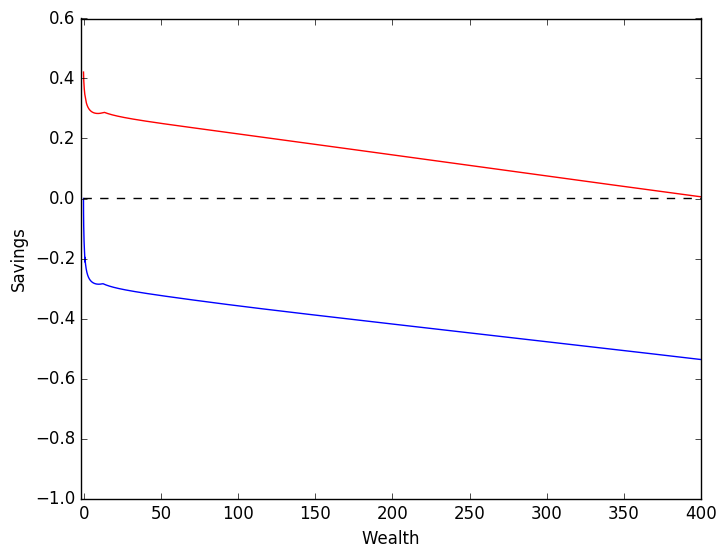

PyObject <matplotlib.text.Text object at 0x321e1ccf8>

In [57]:
using PyPlot

adot = w*zz + (R-r)*k + r*aa - c

plot(a,adot[:,1],"b",a,adot[:,2],"r",a,zeros(I),"k--")
xlim((-2,400))
xlabel("Wealth")
ylabel("Savings")




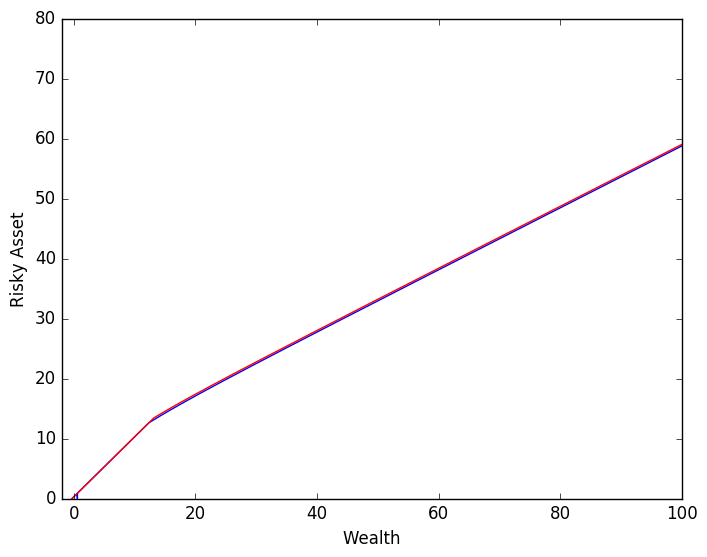

PyObject <matplotlib.text.Text object at 0x3228a82e8>

In [58]:
plot(a,k[:,1],"b",a,k[:,2],"r")
xlim((-2,100))
ylim((0,80))
xlabel("Wealth")
ylabel("Risky Asset")

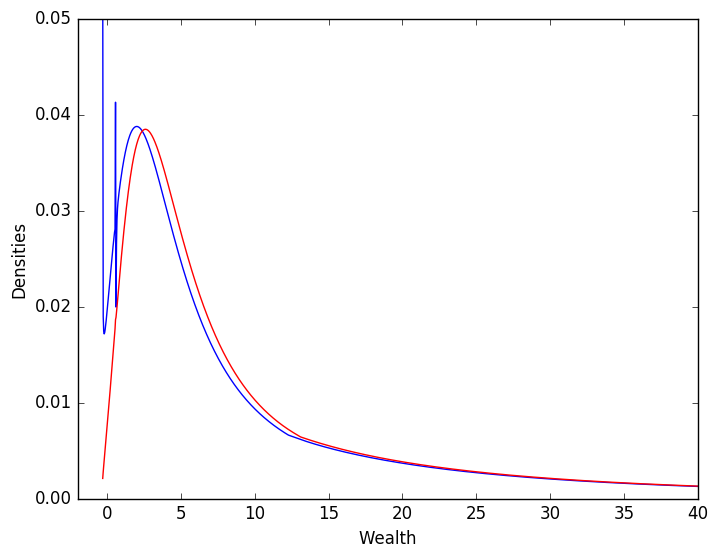

PyObject <matplotlib.text.Text object at 0x3226270f0>

In [59]:
plot(a,g[:,1],"b",a,g[:,2],"r")
xlim((-2,40))
ylim((0,0.05))
xlabel("Wealth")
ylabel("Densities")